In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Scrape data from the website
base_url = "https://seismonepal.gov.np/earthquakes/index"

max_pages = 62  # Update as needed
# max_pages = 5  # to test

# Function to scrape data from a single page
def scrape_page(page_url):
    response = requests.get(page_url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Locate the table
    table = soup.find('table', {'class': 'table table-striped table-bordered'})
    rows = table.find('tbody').find_all('tr')

    data = []
    for row in rows:
        cols = row.find_all('td')
        cols = [col.text.strip() for col in cols]
        if cols:  # Check for non-empty rows
            data.append({
                'Date': cols[1],
                'Time': cols[2],
                'Latitude': str(cols[3]),
                'Longitude': str(cols[4]),
                'Magnitude': cols[5],
                'Epicenter': cols[6]
            })
    return data

# Main function to scrape multiple pages
def scrape_all_pages(base_url, max_pages):
    all_data = []
    for page in range(1, max_pages + 1):
        url = f"{base_url}?page={page}"
        page_data = scrape_page(url)
        all_data.extend(page_data)
        print(f"Scraped page {page}")
    return all_data

data = scrape_all_pages(base_url, max_pages)
# print(data)

Scraped page 1
Scraped page 2
Scraped page 3
Scraped page 4
Scraped page 5
Scraped page 6
Scraped page 7
Scraped page 8
Scraped page 9
Scraped page 10
Scraped page 11
Scraped page 12
Scraped page 13
Scraped page 14
Scraped page 15
Scraped page 16
Scraped page 17
Scraped page 18
Scraped page 19
Scraped page 20
Scraped page 21
Scraped page 22
Scraped page 23
Scraped page 24
Scraped page 25
Scraped page 26
Scraped page 27
Scraped page 28
Scraped page 29
Scraped page 30
Scraped page 31
Scraped page 32
Scraped page 33
Scraped page 34
Scraped page 35
Scraped page 36
Scraped page 37
Scraped page 38
Scraped page 39
Scraped page 40
Scraped page 41
Scraped page 42
Scraped page 43
Scraped page 44
Scraped page 45
Scraped page 46
Scraped page 47
Scraped page 48
Scraped page 49
Scraped page 50
Scraped page 51
Scraped page 52
Scraped page 53
Scraped page 54
Scraped page 55
Scraped page 56
Scraped page 57
Scraped page 58
Scraped page 59
Scraped page 60
Scraped page 61
Scraped page 62


In [2]:
# Function to clean date field
def clean_date(date_str):
    # Extract the A.D. date part
    if 'A.D.:' in date_str:
        return date_str.split('A.D.:')[1].strip()
    return None

# Function to clean time field
def clean_time(time_str):
    # Extract the Local time part
    if 'Local:' in time_str:
        return time_str.split('Local:')[1].split('UTC:')[0].strip()
    return None

# Function to clean numeric fields
def clean_numeric(value):
    try:
        return float(value)
    except ValueError:
        return None

# Clean and process the data
cleaned_data = []
for entry in data:
    cleaned_entry = {
        'Date': clean_date(entry['Date']),
        'Time': clean_time(entry['Time']),
        'Latitude': clean_numeric(entry['Latitude']),
        'Longitude': clean_numeric(entry['Longitude']),
        'Magnitude': clean_numeric(entry['Magnitude']),
        'Epicenter': entry['Epicenter']
    }
    cleaned_data.append(cleaned_entry)

# Convert to DataFrame
df = pd.DataFrame(cleaned_data)

#remove null value from latitude and longitude
df = df.dropna(subset=['Latitude', 'Longitude'], how='any')

# Ensure the Latitude and Longitude columns are treated as strings before replacing
df.loc[:, 'Latitude'] = df['Latitude'].astype(str).str.replace(':', '.').astype(float)
df.loc[:, 'Longitude'] = df['Longitude'].astype(str).str.replace(':', '.').astype(float)

# Convert 'Date' to date-only
df['Date'] = pd.to_datetime(df['Date']).dt.date

# Combine 'Date' and 'Time' when needed
df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))

# # Save to CSV
df.to_csv('earthquake_data_nepal.csv', index=False)
print("Data saved to earthquake_data_nepal.csv")

Data saved to earthquake_data_nepal.csv


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1234 entries, 0 to 1236
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1234 non-null   object        
 1   Time       1234 non-null   object        
 2   Latitude   1234 non-null   float64       
 3   Longitude  1234 non-null   float64       
 4   Magnitude  1234 non-null   float64       
 5   Epicenter  1234 non-null   object        
 6   Datetime   1234 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 77.1+ KB
None


In [6]:
# Display DataFrame
print(df)

            Date   Time  Latitude  Longitude  Magnitude        Epicenter  \
0     2025-01-07  06:50     28.31      87.37        7.0  Dinggye, China*   
1     2025-01-03  08:03     29.57      82.19        4.4             Mugu   
2     2025-01-03  08:29     28.54      84.13        4.1           Manang   
3     2025-01-02  13:02     27.77      85.57        4.8    Sindhupalchok   
4     2024-12-31  07:54     29.45      80.86        4.6          Baitadi   
...          ...    ...       ...        ...        ...              ...   
1232  1994-06-25  14:17     27.82      86.19        5.1          Dolakha   
1233  1994-05-25  19:10     29.80      82.41        4.5             Mugu   
1234  1994-05-25  12:00     29.81      81.77        4.0           Bajura   
1235  1994-05-03  00:30     28.52      83.03        4.4          Baglung   
1236  1994-03-08  07:50     29.33      81.83        4.0          Kalikot   

                Datetime  
0    2025-01-07 06:50:00  
1    2025-01-03 08:03:00  
2    2

In [5]:
print(df.describe())

          Latitude    Longitude    Magnitude                       Datetime
count  1234.000000  1234.000000  1234.000000                           1234
mean     28.285024    84.664668     4.371556  2013-07-19 09:47:41.426256128
min      23.710000    69.850000     4.000000            1994-03-08 07:50:00
25%      27.720000    82.550000     4.000000            2011-03-25 18:30:15
50%      27.940000    85.340000     4.200000            2015-05-12 22:08:00
75%      28.617500    86.100000     4.500000            2016-12-25 10:39:30
max      87.840000    89.880000     7.600000            2025-01-07 06:50:00
std       1.892666     2.140369     0.502864                            NaN


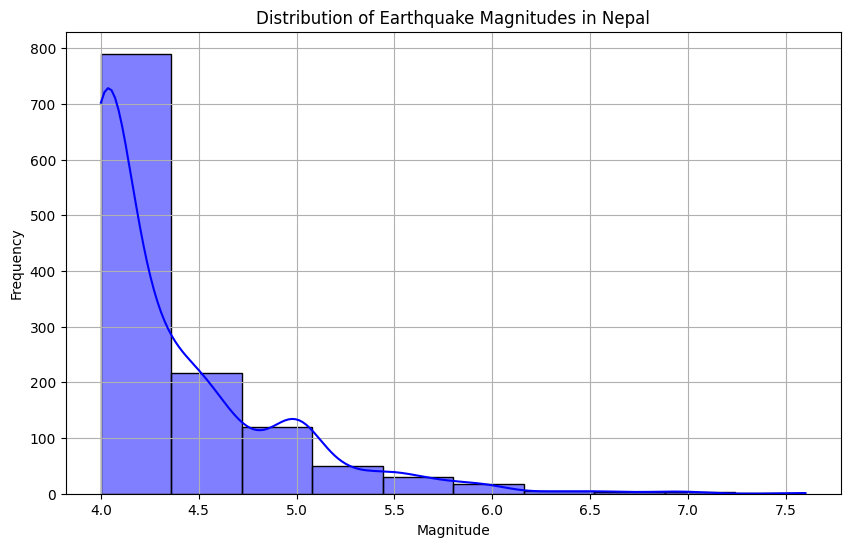

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization: Histogram of Magnitudes
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.histplot(df['Magnitude'], bins=10, kde=True, color='blue')
plt.title('Distribution of Earthquake Magnitudes in Nepal')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

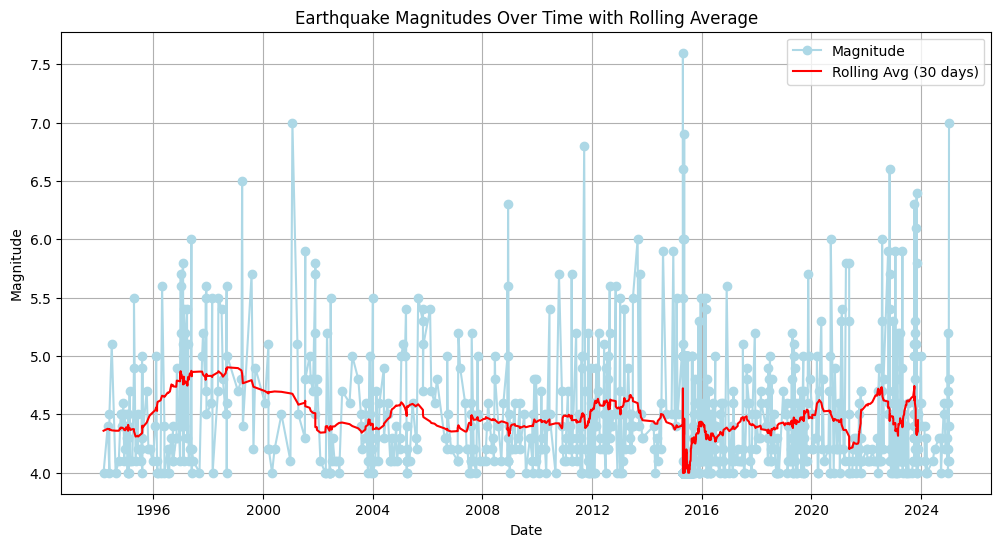

In [8]:
# Calculate Time Series Analysis with Rolling Averages
df['Rolling_Magnitude_Avg'] = df['Magnitude'].rolling(window=30).mean()  # Adjust window as needed

# Plot time series with rolling average
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Magnitude'], marker='o', linestyle='-', color='lightblue', label='Magnitude')
plt.plot(df['Date'], df['Rolling_Magnitude_Avg'], color='red', label='Rolling Avg (30 days)')
plt.title('Earthquake Magnitudes Over Time with Rolling Average')
plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.grid(True)
plt.legend()
plt.show()

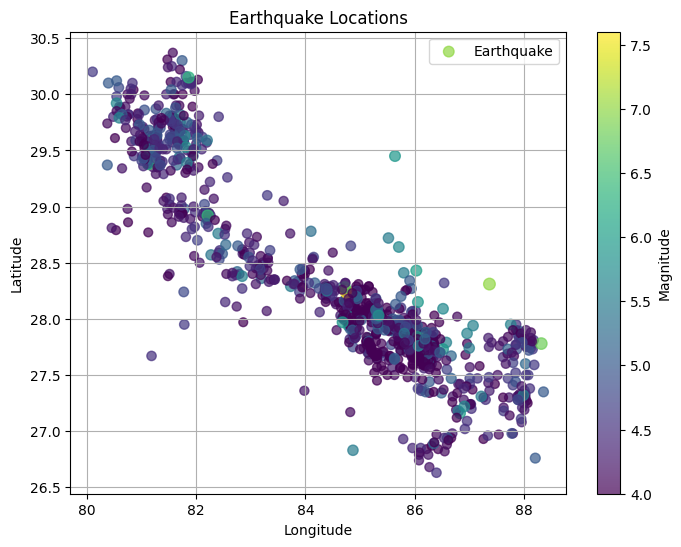

In [11]:
# Visualization: Scatter Plot of Earthquake Locations

# Define the bounding box for Nepal (approximate values)
min_latitude = 26.3
max_latitude = 30.5
min_longitude = 80.0
max_longitude = 88.5

# Filter the DataFrame
filtered_df = df[
    (df['Latitude'] >= min_latitude) & (df['Latitude'] <= max_latitude) &
    (df['Longitude'] >= min_longitude) & (df['Longitude'] <= max_longitude)
]
plt.figure(figsize=(8, 6))

cmap = 'viridis' # Using built-in colormap

plt.scatter(filtered_df['Longitude'], filtered_df['Latitude'],
            s=filtered_df['Magnitude']*10, alpha=0.7,
            c=filtered_df['Magnitude'], cmap=cmap, label='Earthquake')
plt.colorbar(label='Magnitude')
plt.title('Earthquake Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

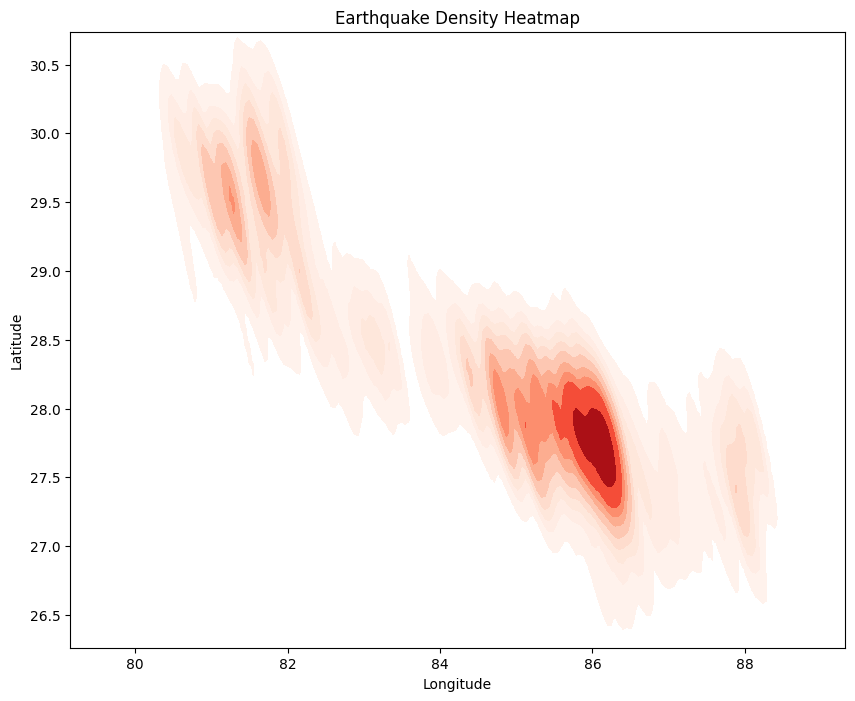

In [12]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.kdeplot(x=filtered_df['Longitude'], y=filtered_df['Latitude'], cmap="Reds", fill=True, bw_adjust=.5)
plt.title('Earthquake Density Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [13]:
import folium
from IPython.display import display

# Create a map centered on Nepal
map_nepal = folium.Map(location=[28.3949, 84.1240], zoom_start=7)

# Add markers for each earthquake
for _, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Date: {row['Date']}, Time: {row['Time']}, Magnitude: {row['Magnitude']}, Epicenter: {row['Epicenter']}",
        icon=folium.Icon(color='red' if row['Magnitude'] >= 5 else 'orange')
    ).add_to(map_nepal)

# Save map to an HTML file
map_nepal.save('earthquake_map_nepal.html')
print("Map saved to earthquake_map_nepal.html")

# Display the map directly:
display(map_nepal)

Map saved to earthquake_map_nepal.html
